In [171]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [226]:
# Ascessing The Data
match= pd.read_csv("matches .csv")           
delivery= pd.read_csv("deliveries.csv")
delivery.tail(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [147]:
merge=delivery.merge(match,right_on='id',left_on='match_id')    # merging Both data to get a new dataFrame

# qtn1 : line Plot

In [148]:
def S_bats_G(name):                     #function
    frame=merge[['season','batsman','batsman_runs']]          # fetching Only required Cols
    # making Pivot Frame having index=Season , cols = batsman Names, NAn valuefill with 0
    pivot_frame=frame.pivot_table(index='season',columns='batsman',values='batsman_runs',aggfunc='sum',fill_value=0)
    (pivot_frame[name]).plot(color='red',marker='o',markersize=12)       #ploting graph 
    plt.title('Seasonal Score')                      #title
    plt.xlabel('Season\nBatsman: %s'%name)            #labels
    plt.ylabel('Runs')
    plt.show()

DA Warner


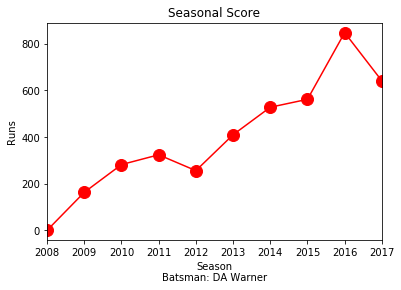

In [149]:
S_bats_G(input())

# qtn2

In [238]:
def scr_bats_lyf(name):          # for batsman Scoring Number of 1's ,2's,3's....6's
    frame1=merge[['batsman','batsman_runs']]      #using only req colmns
    frame1=frame1[frame1['batsman']==name]          #masking with input batsman name
    g_frame1=frame1.groupby(['batsman_runs'])          #grouping over 1's ,2's,3's....6's
    wrk_fr= (g_frame1['batsman'].value_counts()).reset_index( name='run_counts')   #reseting 
    plt.pie(wrk_fr['run_counts'],labels=wrk_fr['batsman_runs'].to_list(),autopct='%0.1f%%',frame=True)       
    plt.title('Batsman Scoring chart %s'%name)          #ploting pie chart , frame=True beacuse chart labels are getting compressed
    plt.show()

Iqbal Abdulla


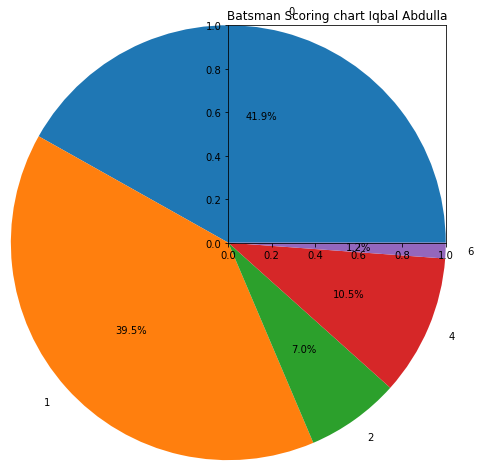

In [239]:
scr_bats_lyf(input())